In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Collecting

In [2]:
data = pd.read_csv('headbrain.csv')
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


### Data Analyzing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


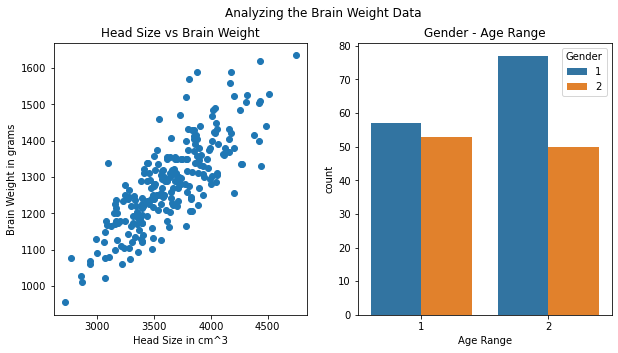

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Analyzing the Brain Weight Data')

axes[0].scatter(data['Head Size(cm^3)'].values, data['Brain Weight(grams)'].values)
axes[0].set(xlabel='Head Size in cm^3', ylabel='Brain Weight in grams')
axes[0].set_title('Head Size vs Brain Weight')

sns.countplot(ax=axes[1], data=data, x='Age Range', hue='Gender')
axes[1].set_title('Gender - Age Range')

plt.show()

In [5]:
from sklearn.model_selection import train_test_split

x = data.drop(['Brain Weight(grams)'], axis=1)
y = data['Brain Weight(grams)']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

x_train.head(5)

(165, 3) (165,)
(72, 3) (72,)


,Gender,Age Range,Head Size(cm^3)
71,1,2,3858
91,1,2,3318
23,1,1,3710
64,1,2,3727
170,2,1,3145


### Firstly, only 'Head Size' feature will be used for model

In [6]:
x_train_1 = x_train['Head Size(cm^3)']
x_test_1 = x_test['Head Size(cm^3)']
print(x_train.shape, '--> x shape  ', x_test.shape, '--> y shape')

(165, 3) --> x shape   (72, 3) --> y shape


In [7]:
from sklearn import linear_model

x_train_1 = np.array(x_train_1).reshape(len(x_train_1), 1)
y_train_1 = np.array(y_train).reshape(len(y_train), 1)
x_test_1 = np.array(x_test_1).reshape(len(x_test_1), 1)
model_1 = linear_model.LinearRegression()
model_1.fit(x_train_1, y_train_1)
y_pred_1 = model_1.predict(x_test_1)

In [8]:
from sklearn.metrics import r2_score, mean_squared_error

print("Coefficient: ", model_1.coef_)
print("Intercept: ", model_1.intercept_)
print("Mean Squared Error: %.2f " % mean_squared_error(y_test, y_pred_1))
print("R-Squared: %.2f " % r2_score(y_test, y_pred_1))

Coefficient:  [[0.26464727]]
Intercept:  [320.88257877]
Mean Squared Error: 5455.27 
R-Squared: 0.62 


In [28]:
print('Prediction \t Test Feature Values \t Test Target Value\n\t -------------------------------------------')
for i in range(10):
    print(y_pred_1[i], '\t', x_test_1[i], '\t', y_test.values[i]) 

Prediction 	 Test Feature Values 	 Test Target Value
	 -------------------------------------------
[1246.35408981] 	 [3497] 	 1358
[1246.35408981] 	 [3497] 	 1280
[1198.98222807] 	 [3318] 	 1175
[1241.32579163] 	 [3478] 	 1270
[1196.60040262] 	 [3309] 	 1120
[1176.48720993] 	 [3233] 	 1104
[1306.4290206] 	 [3724] 	 1280
[1422.07987857] 	 [4161] 	 1405
[1205.86305715] 	 [3344] 	 1220
[1353.00694052] 	 [3900] 	 1270


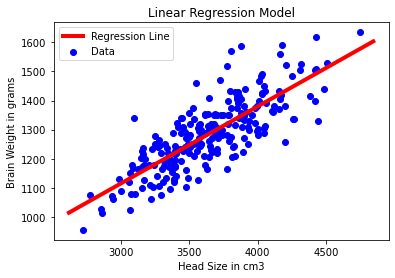

In [12]:
x_line = np.linspace(np.min(x)['Head Size(cm^3)']-100, np.max(x)['Head Size(cm^3)']+100, 1000)
reg_line = model_1.intercept_ + model_1.coef_[0] * x_line
plt.plot(x_line, reg_line, color='r', linewidth=4, label='Regression Line')
plt.scatter(x['Head Size(cm^3)'], y, color='b', label='Data')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

### Now, 'Age Range' and 'Gender' features will be added.

In [13]:
from sklearn import linear_model

model_2 = linear_model.LinearRegression()
model_2.fit(x_train, y_train)
y_pred_2 = model_2.predict(x_test)

In [14]:
from sklearn.metrics import r2_score, mean_squared_error

print("Coefficient: ", model_2.coef_)
print("Intercept: ", model_2.intercept_)
print("Mean Squared Error: %.2f " % mean_squared_error(y_test, y_pred_2))
print("R-Squared: %.2f " % r2_score(y_test, y_pred_2))

Coefficient:  [-18.08917571 -20.84690473   0.24832997]
Intercept:  438.5032681031835
Mean Squared Error: 5165.81 
R-Squared: 0.64 


In [25]:
print('Prediction \t\t Test Feature Values \t Test Target Value\n\t -------------------------------------------')
for i in range(10):
    print(y_pred_2[i], '\t', x_test.values[i], '\t', y_test.values[i])

Prediction 		 Test Feature Values 	 Test Target Value
	 -------------------------------------------
1267.977096955583 	 [   1    1 3497] 	 1358
1249.8879212422553 	 [   2    1 3497] 	 1280
1184.5899516620125 	 [   2    2 3318] 	 1175
1242.411922767983 	 [   1    2 3478] 	 1270
1200.4441576345039 	 [   1    2 3309] 	 1120
1163.4819041096707 	 [   2    2 3233] 	 1104
1306.2588247055673 	 [   2    1 3724] 	 1280
1432.868197835051 	 [   1    1 4161] 	 1405
1191.046530913317 	 [   2    2 3344] 	 1220
1347.2071706160787 	 [   1    2 3900] 	 1270
